In [1]:
#importing dependencies
import numpy as np
import pandas as pd
import re,string
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
import pickle
# nltk.download('stopwords')
# %matplotlib inline

In [2]:
#reading csv file
df = pd.read_csv('bbc-text.csv')
df

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
...,...,...
2220,business,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...


In [3]:
no_of_classes = set(df['category'])
no_of_classes

{'business', 'entertainment', 'politics', 'sport', 'tech'}

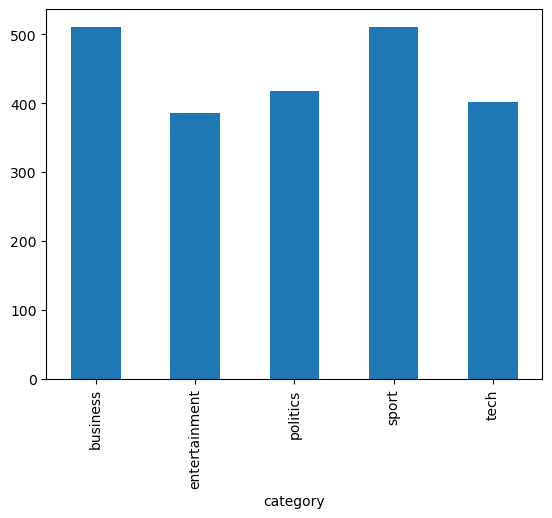

In [4]:
df.groupby('category').text.count().plot.bar(ylim = 0)

plt.show()

In [5]:
nltk.download('stopwords')
words = stopwords.words('english')
words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nisch\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [6]:
stemmer = PorterStemmer()

In [7]:
plurals = df['text'][0].split()
plurals
singles = " ".join([stemmer.stem(plural) for plural in plurals])
singles

'tv futur in the hand of viewer with home theatr system plasma high-definit tv and digit video record move into the live room the way peopl watch tv will be radic differ in five year time. that is accord to an expert panel which gather at the annual consum electron show in la vega to discuss how these new technolog will impact one of our favourit pastimes. with the us lead the trend programm and other content will be deliv to viewer via home network through cabl satellit telecom compani and broadband servic provid to front room and portabl devices. one of the most talked-about technolog of ce ha been digit and person video record (dvr and pvr). these set-top box like the us s tivo and the uk s sky+ system allow peopl to record store play paus and forward wind tv programm when they want. essenti the technolog allow for much more personalis tv. they are also be built-in to high-definit tv set which are big busi in japan and the us but slower to take off in europ becaus of the lack of hig

In [8]:
re.sub("[^a-zA-Z]", "", 'nischal12&&')


'nischal'

In [9]:
cleaned_data = lambda x: "".join([i for i in re.sub("[^a-zA-Z]", " ", x)])
cleaned_data(singles)

'tv futur in the hand of viewer with home theatr system plasma high definit tv and digit video record move into the live room the way peopl watch tv will be radic differ in five year time  that is accord to an expert panel which gather at the annual consum electron show in la vega to discuss how these new technolog will impact one of our favourit pastimes  with the us lead the trend programm and other content will be deliv to viewer via home network through cabl satellit telecom compani and broadband servic provid to front room and portabl devices  one of the most talked about technolog of ce ha been digit and person video record  dvr and pvr   these set top box like the us s tivo and the uk s sky  system allow peopl to record store play paus and forward wind tv programm when they want  essenti the technolog allow for much more personalis tv  they are also be built in to high definit tv set which are big busi in japan and the us but slower to take off in europ becaus of the lack of hig

In [10]:
#cleaning dataset
words = stopwords.words("english")
df['cleaned'] = df['text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())
df

,category,text,cleaned
0,tech,tv future in the hands of viewers with home th...,tv futur hand viewer home theatr system plasma...
1,business,worldcom boss left books alone former worldc...,worldcom boss left book alon former worldcom b...
2,sport,tigers wary of farrell gamble leicester say ...,tiger wari farrel gambl leicest say rush make ...
3,sport,yeading face newcastle in fa cup premiership s...,yead face newcastl fa cup premiership side new...
4,entertainment,ocean s twelve raids box office ocean s twelve...,ocean twelv raid box offic ocean twelv crime c...
...,...,...,...
2220,business,cars pull down us retail figures us retail sal...,car pull us retail figur us retail sale fell j...
2221,politics,kilroy unveils immigration policy ex-chatshow ...,kilroy unveil immigr polici ex chatshow host r...
2222,entertainment,rem announce new glasgow concert us band rem h...,rem announc new glasgow concert us band rem an...
2223,politics,how political squabbles snowball it s become c...,polit squabbl snowbal becom commonplac argu bl...


In [11]:
df1 = df[['category', 'cleaned']]

In [12]:
df1

,category,cleaned
0,tech,tv futur hand viewer home theatr system plasma...
1,business,worldcom boss left book alon former worldcom b...
2,sport,tiger wari farrel gambl leicest say rush make ...
3,sport,yead face newcastl fa cup premiership side new...
4,entertainment,ocean twelv raid box offic ocean twelv crime c...
...,...,...
2220,business,car pull us retail figur us retail sale fell j...
2221,politics,kilroy unveil immigr polici ex chatshow host r...
2222,entertainment,rem announc new glasgow concert us band rem an...
2223,politics,polit squabbl snowbal becom commonplac argu bl...


In [13]:
# Training model
from sklearn.linear_model import LogisticRegression
log_regression = LogisticRegression()

vectorizer = TfidfVectorizer()

X = df['cleaned']
Y = df['category']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.05) #Splitting dataset
# #Creating Pipeline
pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=1200)),
                     ('clf', LogisticRegression(random_state=0))])
#Training model
model = pipeline.fit(X_train, y_train)

In [14]:
y_test.iloc[0:1]

2021    entertainment
Name: category, dtype: object

In [15]:
predict = model.predict(X_test.iloc[0:1])
print(predict)

['entertainment']


In [16]:
predict = model.predict(X_test)
predict

array(['entertainment', 'business', 'sport', 'business', 'sport',
       'entertainment', 'business', 'entertainment', 'business',
       'business', 'tech', 'politics', 'tech', 'tech', 'politics',
       'business', 'tech', 'entertainment', 'politics', 'entertainment',
       'sport', 'politics', 'business', 'entertainment', 'entertainment',
       'politics', 'tech', 'business', 'politics', 'sport', 'sport',
       'politics', 'tech', 'entertainment', 'entertainment', 'business',
       'entertainment', 'politics', 'entertainment', 'entertainment',
       'tech', 'politics', 'business', 'tech', 'politics',
       'entertainment', 'sport', 'sport', 'politics', 'business',
       'entertainment', 'entertainment', 'sport', 'entertainment',
       'sport', 'sport', 'entertainment', 'sport', 'politics', 'sport',
       'entertainment', 'tech', 'sport', 'entertainment', 'tech', 'tech',
       'politics', 'entertainment', 'entertainment', 'politics',
       'business', 'sport', 'business', 

In [20]:
data = {'news': [input('Enter the news = ')] for i in range(1)}
data = pd.DataFrame(data)
data
predict = model.predict(data['news'])
predict[0]

Enter the news = Gillingham v Sheff Utd, Stoke v Brighton & QPR v Bournemouth among 10 FA Cup ties under way


'sport'